In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [20]:
labels = ['alif','yay']
img_size =50 # need to be set
#data_dir='training'

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
       
        class_num = labels.index(label)
        for img in os.listdir(path):
                img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
    return np.array(data,dtype=object)

In [21]:
train = get_data('training')

C:\Users\RNS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

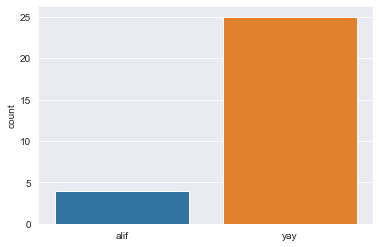

In [22]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("alif")
    else:
        l.append("yay")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'alif')

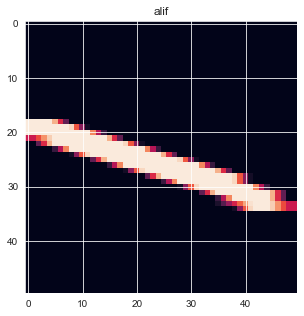

In [23]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [24]:
x_train = []
y_train = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
    # Normalize the data
x_train = np.array(x_train) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

In [29]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(50,50,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)        

In [31]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [33]:
history = model.fit(x_train,y_train,epochs = 500)

Epoch 1/500


C:\Users\RNS\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 2s 2s/step - loss: 0.6406 - accuracy: 0.8621
Epoch 2/500
1/1 [==============================] - 0s 110ms/step - loss: 0.6413 - accuracy: 0.7931
Epoch 3/500
1/1 [==============================] - 0s 112ms/step - loss: 0.6384 - accuracy: 0.8621
Epoch 4/500
1/1 [==============================] - 0s 104ms/step - loss: 0.6278 - accuracy: 0.8276
Epoch 5/500
1/1 [==============================] - 0s 114ms/step - loss: 0.6507 - accuracy: 0.8276
Epoch 6/500
1/1 [==============================] - 0s 113ms/step - loss: 0.6424 - accuracy: 0.8276
Epoch 7/500
1/1 [==============================] - 0s 109ms/step - loss: 0.6460 - accuracy: 0.8276
Epoch 8/500
1/1 [==============================] - 0s 124ms/step - loss: 0.6363 - accuracy: 0.8621
Epoch 9/500
1/1 [==============================] - 0s 118ms/step - loss: 0.6309 - accuracy: 0.8621
Epoch 10/500
1/1 [==============================] - 0s 115ms/step - loss: 0.6274 - accuracy: 0.8621
Epoch 11/500
1/1 [======

1/1 [==============================] - 0s 124ms/step - loss: 0.6289 - accuracy: 0.8621
Epoch 84/500
1/1 [==============================] - 0s 124ms/step - loss: 0.6227 - accuracy: 0.8621
Epoch 85/500
1/1 [==============================] - 0s 106ms/step - loss: 0.6146 - accuracy: 0.8621
Epoch 86/500
1/1 [==============================] - 0s 102ms/step - loss: 0.6242 - accuracy: 0.8621
Epoch 87/500
1/1 [==============================] - 0s 106ms/step - loss: 0.6380 - accuracy: 0.8276
Epoch 88/500
1/1 [==============================] - 0s 106ms/step - loss: 0.6100 - accuracy: 0.8621
Epoch 89/500
1/1 [==============================] - 0s 108ms/step - loss: 0.6217 - accuracy: 0.8276
Epoch 90/500
1/1 [==============================] - 0s 106ms/step - loss: 0.6223 - accuracy: 0.8966
Epoch 91/500
1/1 [==============================] - 0s 109ms/step - loss: 0.6118 - accuracy: 0.8621
Epoch 92/500
1/1 [==============================] - 0s 110ms/step - loss: 0.6212 - accuracy: 0.8621
Epoch 93/500


1/1 [==============================] - 0s 135ms/step - loss: 0.5888 - accuracy: 0.8621
Epoch 165/500
1/1 [==============================] - 0s 121ms/step - loss: 0.6036 - accuracy: 0.8621
Epoch 166/500
1/1 [==============================] - 0s 133ms/step - loss: 0.5882 - accuracy: 0.8621
Epoch 167/500
1/1 [==============================] - 0s 123ms/step - loss: 0.5793 - accuracy: 0.8621
Epoch 168/500
1/1 [==============================] - 0s 115ms/step - loss: 0.5803 - accuracy: 0.8621
Epoch 169/500
1/1 [==============================] - 0s 122ms/step - loss: 0.5993 - accuracy: 0.8621
Epoch 170/500
1/1 [==============================] - 0s 116ms/step - loss: 0.5781 - accuracy: 0.8621
Epoch 171/500
1/1 [==============================] - 0s 162ms/step - loss: 0.5894 - accuracy: 0.8621
Epoch 172/500
1/1 [==============================] - 0s 155ms/step - loss: 0.5913 - accuracy: 0.8621
Epoch 173/500
1/1 [==============================] - 0s 133ms/step - loss: 0.5756 - accuracy: 0.8621
Epoc

1/1 [==============================] - 0s 128ms/step - loss: 0.5632 - accuracy: 0.8966
Epoch 246/500
1/1 [==============================] - 0s 120ms/step - loss: 0.5660 - accuracy: 0.8621
Epoch 247/500
1/1 [==============================] - 0s 116ms/step - loss: 0.5680 - accuracy: 0.8621
Epoch 248/500
1/1 [==============================] - 0s 116ms/step - loss: 0.5562 - accuracy: 0.8621
Epoch 249/500
1/1 [==============================] - 0s 117ms/step - loss: 0.5691 - accuracy: 0.8621
Epoch 250/500
1/1 [==============================] - 0s 115ms/step - loss: 0.5689 - accuracy: 0.8621
Epoch 251/500
1/1 [==============================] - 0s 120ms/step - loss: 0.5634 - accuracy: 0.8621
Epoch 252/500
1/1 [==============================] - 0s 119ms/step - loss: 0.5737 - accuracy: 0.8621
Epoch 253/500
1/1 [==============================] - 0s 123ms/step - loss: 0.5637 - accuracy: 0.8621
Epoch 254/500
1/1 [==============================] - 0s 123ms/step - loss: 0.5645 - accuracy: 0.8621
Epoc

1/1 [==============================] - 0s 115ms/step - loss: 0.5422 - accuracy: 0.8621
Epoch 327/500
1/1 [==============================] - 0s 108ms/step - loss: 0.5522 - accuracy: 0.8621
Epoch 328/500
1/1 [==============================] - 0s 110ms/step - loss: 0.5485 - accuracy: 0.8621
Epoch 329/500
1/1 [==============================] - 0s 109ms/step - loss: 0.5499 - accuracy: 0.8966
Epoch 330/500
1/1 [==============================] - 0s 118ms/step - loss: 0.5434 - accuracy: 0.8621
Epoch 331/500
1/1 [==============================] - 0s 113ms/step - loss: 0.5400 - accuracy: 0.8621
Epoch 332/500
1/1 [==============================] - 0s 114ms/step - loss: 0.5421 - accuracy: 0.8621
Epoch 333/500
1/1 [==============================] - 0s 110ms/step - loss: 0.5432 - accuracy: 0.8621
Epoch 334/500
1/1 [==============================] - 0s 109ms/step - loss: 0.5472 - accuracy: 0.8621
Epoch 335/500
1/1 [==============================] - 0s 106ms/step - loss: 0.5484 - accuracy: 0.8621
Epoc

1/1 [==============================] - 0s 119ms/step - loss: 0.5133 - accuracy: 0.8621
Epoch 408/500
1/1 [==============================] - 0s 113ms/step - loss: 0.5249 - accuracy: 0.8621
Epoch 409/500
1/1 [==============================] - 0s 125ms/step - loss: 0.5154 - accuracy: 0.8621
Epoch 410/500
1/1 [==============================] - 0s 124ms/step - loss: 0.5240 - accuracy: 0.8621
Epoch 411/500
1/1 [==============================] - 0s 117ms/step - loss: 0.5195 - accuracy: 0.8621
Epoch 412/500
1/1 [==============================] - 0s 124ms/step - loss: 0.5150 - accuracy: 0.8621
Epoch 413/500
1/1 [==============================] - 0s 113ms/step - loss: 0.5246 - accuracy: 0.8621
Epoch 414/500
1/1 [==============================] - 0s 124ms/step - loss: 0.5119 - accuracy: 0.8621
Epoch 415/500
1/1 [==============================] - 0s 133ms/step - loss: 0.5310 - accuracy: 0.8621
Epoch 416/500
1/1 [==============================] - 0s 124ms/step - loss: 0.5294 - accuracy: 0.8621
Epoc

1/1 [==============================] - 0s 122ms/step - loss: 0.4917 - accuracy: 0.8621
Epoch 489/500
1/1 [==============================] - 0s 106ms/step - loss: 0.4945 - accuracy: 0.8621
Epoch 490/500
1/1 [==============================] - 0s 109ms/step - loss: 0.5127 - accuracy: 0.8621
Epoch 491/500
1/1 [==============================] - 0s 132ms/step - loss: 0.4980 - accuracy: 0.8621
Epoch 492/500
1/1 [==============================] - 0s 111ms/step - loss: 0.4902 - accuracy: 0.8621
Epoch 493/500
1/1 [==============================] - 0s 106ms/step - loss: 0.4956 - accuracy: 0.8966
Epoch 494/500
1/1 [==============================] - 0s 116ms/step - loss: 0.5038 - accuracy: 0.8621
Epoch 495/500
1/1 [==============================] - 0s 150ms/step - loss: 0.4820 - accuracy: 0.8621
Epoch 496/500
1/1 [==============================] - 0s 129ms/step - loss: 0.4901 - accuracy: 0.8621
Epoch 497/500
1/1 [==============================] - 0s 111ms/step - loss: 0.4909 - accuracy: 0.8621
Epoc

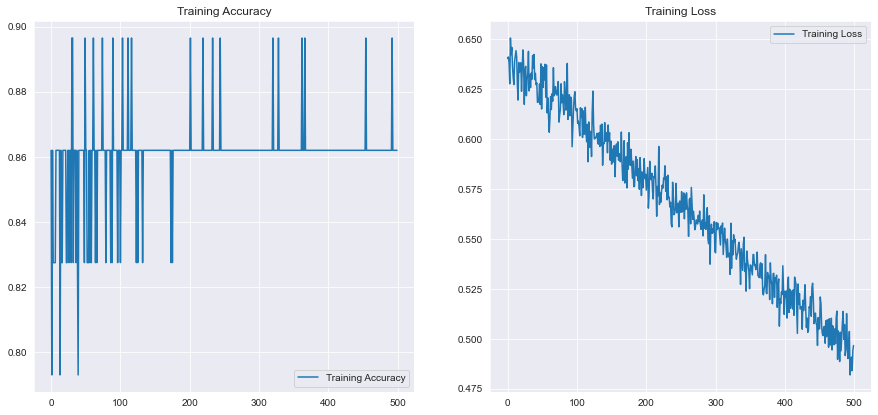

In [38]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()